In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize
from keras.utils import to_categorical
from sklearn.utils import shuffle

In [3]:
def prepare_data(dataType, dataLength):
    X = np.zeros((dataLength, 150, 150, 3), dtype=np.uint8)
    Y = np.zeros((dataLength, 1), dtype=np.uint8)
    image_dir = "Dataset/seg_" + dataType + "/"

    i=0
    j=-1

    for _,folders,_ in os.walk(image_dir):
        if(j>0):
            break
        for folder in folders:
            j+=1
            folder = image_dir + folder + "/"
            for _,_,images in os.walk(folder):
                for image in images:
                    img = imread(folder+image)
                    Y[i] = j
                    try:
                        X[i] = img
                    except ValueError:
                        shape = img.shape
                        X[i, :shape[0], :shape[1], :] = img
                    i+=1
                    
    print("Shape of X : " + str(X.shape))
    print("Shape of Y : " + str(Y.shape))
    Y_oh = to_categorical(Y)
    print("Shape of One hot encoded Y : " + str(Y_oh.shape))
    
    X, Y_oh = shuffle(X, Y_oh)
    print("\nShuffled X and Y")
    print("\nExample image :")
    plt.imshow(X[4,:,:,:])
    plt.show()
    
    np.save("Models/X_" + dataType, X)
    np.save("Models/Y_" + dataType, Y_oh)
    
    print("\nData saved")
    

Shape of X : (14034, 150, 150, 3)
Shape of Y : (14034, 1)
Shape of One hot encoded Y : (14034, 6)

Shuffled X and Y

Example image :


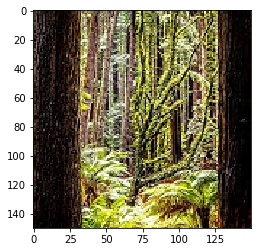


Data saved


In [4]:
train_data_len = 14034
prepare_data("train", train_data_len)

Shape of X : (3000, 150, 150, 3)
Shape of Y : (3000, 1)
Shape of One hot encoded Y : (3000, 6)

Shuffled X and Y

Example image :


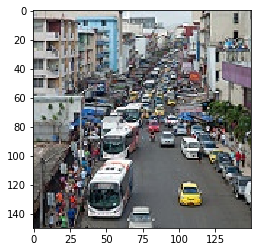


Data saved


In [5]:
test_data_len = 3000
prepare_data("test", test_data_len)

Image size out of bounds
Error image = 7606.jpg


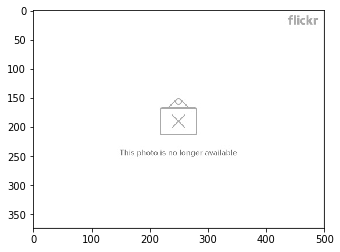

Example image :


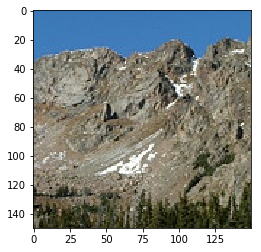

In [8]:
pred_data_len = 7300
X_pred = np.zeros((pred_data_len, 150, 150, 3), dtype=np.uint8)
image_dir = "Dataset/seg_pred/"

i=0

for _,_,images in os.walk(image_dir):
    for image in images:
        img = imread(image_dir+image)
        try:
            X_pred[i] = img
        except ValueError:
            try:
                shape = img.shape
                X_pred[i, :shape[0], :shape[1], :] = img
            except ValueError:
                print("Image size out of bounds")
                print("Error image = " + image)
                plt.imshow(img)
                plt.show()
                continue
        i+=1

print("Example image :")
plt.imshow(X_pred[4,:,:,:])
plt.show()

In [9]:
np.save("Models/X_pred", X_pred)
print("Data Saved")

Data Saved
